<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-required-libraries" data-toc-modified-id="Import-required-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import required libraries</a></span></li><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-Quality-Assessment" data-toc-modified-id="Data-Quality-Assessment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Quality Assessment</a></span><ul class="toc-item"><li><span><a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Check missing values</a></span></li><li><span><a href="#Check-duplicates" data-toc-modified-id="Check-duplicates-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Check duplicates</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Country" data-toc-modified-id="Country-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Country</a></span></li><li><span><a href="#Items-&amp;-transactions" data-toc-modified-id="Items-&amp;-transactions-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Items &amp; transactions</a></span></li><li><span><a href="#Customers-and-transactions" data-toc-modified-id="Customers-and-transactions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Customers and transactions</a></span></li><li><span><a href="#Create-a-customer-level-dataset" data-toc-modified-id="Create-a-customer-level-dataset-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Create a customer-level dataset</a></span><ul class="toc-item"><li><span><a href="#Recency" data-toc-modified-id="Recency-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Recency</a></span></li><li><span><a href="#Frequency" data-toc-modified-id="Frequency-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Frequency</a></span></li><li><span><a href="#Monetary-value" data-toc-modified-id="Monetary-value-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Monetary value</a></span></li></ul></li><li><span><a href="#Combining-RFM-metrics" data-toc-modified-id="Combining-RFM-metrics-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Combining RFM metrics</a></span></li><li><span><a href="#Adding-demographics-data" data-toc-modified-id="Adding-demographics-data-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Adding demographics data</a></span></li><li><span><a href="#Treating-outliers" data-toc-modified-id="Treating-outliers-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Treating outliers</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Standardizing-the-variables" data-toc-modified-id="Standardizing-the-variables-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Standardizing the variables</a></span></li><li><span><a href="#Elbow-method-analysis" data-toc-modified-id="Elbow-method-analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Elbow-method analysis</a></span></li><li><span><a href="#K-means-Clustering" data-toc-modified-id="K-means-Clustering-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>K-means Clustering</a></span></li></ul></li><li><span><a href="#Reference:" data-toc-modified-id="Reference:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Reference:</a></span></li></ul></div>

## Import required libraries

In [187]:
# For data loading and manipulation
import pandas as pd
import numpy as np

# For visualization/EDA
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="white")
%matplotlib inline
from matplotlib import cm

# For modeling/machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Other
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [188]:
df = pd.read_csv('https://s3.amazonaws.com/appdomainteam4/ecomm_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [189]:
# Converting InvoiceDate to date type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))  
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


This dataframe contains 8 variables that correspond to:

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- Description: Product (item) name. Nominal. 
- Quantity: The quantities of each product (item) per transaction. Numeric. 
- InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- Country: Country name. Nominal, the name of the country where each customer resides.

## Problem Statement

* Company X is an online B2B retailer sells small widgets for home/apartment decorations to other small businesses globally
* The company was founded in December 2010 and immediately attracted many business clients within first 3 months
* The monthly total sales dropped starting in Dec 2011. Since it’s the season that most people would make more purchase for gifting, the marketing and sales team were concerned about the revenue performance.
* The marketing team had analyzed all the factors and decided in order to get better conversion and retention, they need to understand the segmentation of the clients in order to create better marketing campaigns.
* We are a team of consultants who will help Company X segment their clients to help the marketing team design the next campaign.

**Below are some of the charts which show the sales trend (from tableau) -**

**Sales by Geography** 

Major business is coming from within the UK. But there is potential that can be captured in other countries as well.
<img src="https://raw.githubusercontent.com/p-sama/Application_domain/master/SalesbyCountry.png">

**Monthly sales** 

Intuitively December should be high due to gifting and decorations in the holiday season.
<img src="https://raw.githubusercontent.com/p-sama/Application_domain/master/MonthlySales.png">

**Weekly revenue** 

Marketing & Sales teams are concerned about maintaining the revenue performance post Nov 2011.
<img src="https://raw.githubusercontent.com/p-sama/Application_domain/master/WeeklyRevenue.png">

**Average Items Purchased** 

Average number of items purchased weekly is declining.
<img src="https://raw.githubusercontent.com/p-sama/Application_domain/master/AvgQuantityPerWeek.png">

## Data Quality Assessment

### Check missing values

In [190]:
# check if data set contains missing values
pd.DataFrame([df.isnull().sum(),df.isnull().sum()/len(df)*100], index=['num_missing', 'percent_missing'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
num_missing,0.0,0.0,1454.000000,0.0,0.0,0.0,135080.000000,0.0,0.0
percent_missing,0.0,0.0,0.268311,0.0,0.0,0.0,24.926694,0.0,0.0


- There are around 25% of Customers missing their ID. It is impossible to impute values for the ID, hence we delete them from the analysis
- There are around 0.27% of items missing their description. And similar to customer ids, it is impossible to impute values for the description. So, we remove these from the dataset

In [191]:
# remove missing values
df = df.dropna()

### Check duplicates

In [192]:
# check if data set contains duplicated records
print(f'The dataset contains {df.duplicated().sum()} duplicated values.')

The dataset contains 5225 duplicated values.


In [193]:
# remove duplicated values from dataset
df.drop_duplicates(inplace = True)

## Exploratory data analysis

### Country

In [194]:
df_country = pd.DataFrame([np.array(df.Country.value_counts().index),df.Country.value_counts()], index=['country_name', 'num_record']).T

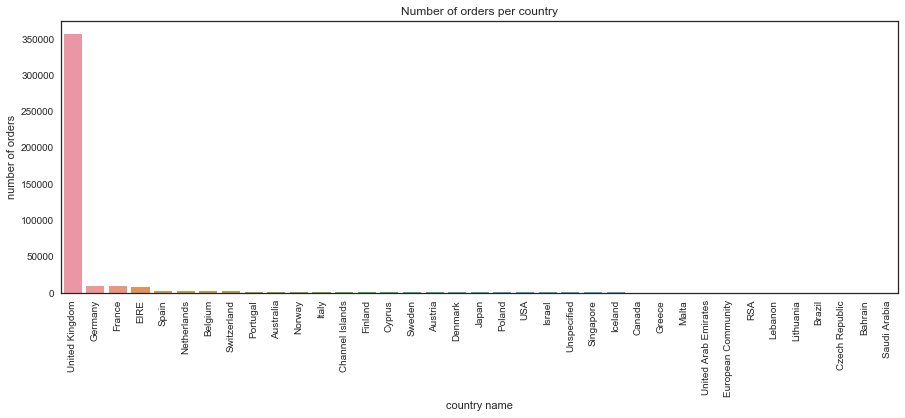

In [195]:
plt.figure(figsize=(15,5))
sns.barplot(x="country_name", y="num_record", data=df_country)
plt.title("Number of orders per country")
plt.xticks(rotation=90)
plt.xlabel('country name')
plt.ylabel('number of orders')
plt.show()

We can see that the dataset is largely dominated by orders made from the UK.

### Items & transactions

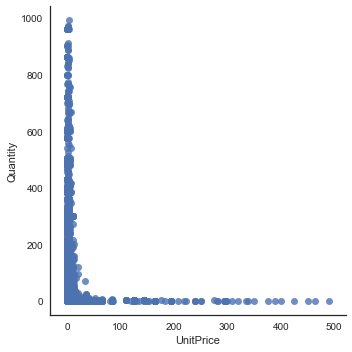

In [196]:
# plotting the unit price against the number of items purchased (removing extreme values)
sns.lmplot(x="UnitPrice", y="Quantity", data=df.loc[(df['UnitPrice']>0) & (df['Quantity']>0) &
                                                    (df['UnitPrice']<500) & (df['Quantity']<1000)
                                                   ], fit_reg=False)

Intuitively, clients purchase low priced items in bulk whereas as low number of high priced items

In [197]:
# Check top selling items
top_sell_df = df.groupby(['StockCode']).agg({'Quantity': 'sum', 'UnitPrice': 'mean'}).reset_index()
top_sell_df.rename(columns={"Quantity":"tot_qty", "UnitPrice":"AvgUnitPrice"}, inplace=True)
top_sell_df['Avg_Rev'] = top_sell_df['tot_qty'] * top_sell_df['AvgUnitPrice']
top_sell_df.head()

,StockCode,tot_qty,AvgUnitPrice,Avg_Rev
0,10002,823,0.850000,699.550000
1,10080,291,0.411905,119.864286
2,10120,192,0.210000,40.320000
3,10123C,5,0.650000,3.250000
4,10124A,16,0.420000,6.720000


In [198]:
top_sell_df_qty = top_sell_df.sort_values(by = 'tot_qty', ascending = False).reset_index().iloc[:20,:]
top_sell_df_qty.head()

,index,StockCode,tot_qty,AvgUnitPrice,Avg_Rev
0,2812,84077,53119,0.292034,15512.529769
1,1092,22197,48689,0.837937,40798.311523
2,3235,85099B,44963,2.013140,90516.833876
3,3069,84879,35215,1.680776,59188.519822
4,3249,85123A,34185,2.891027,98829.745496


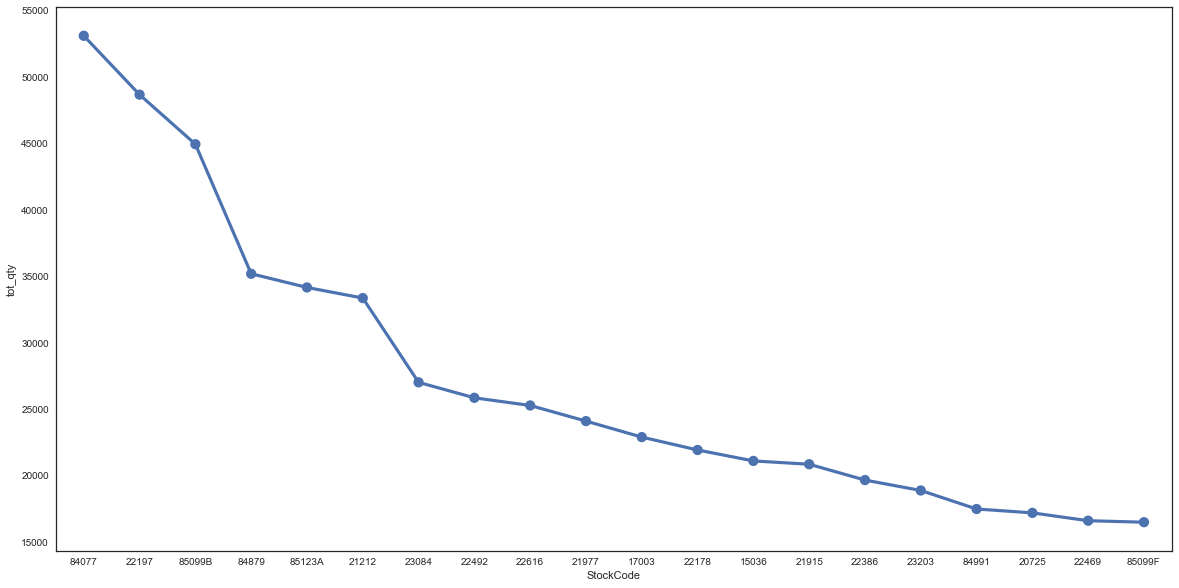

In [199]:
plt.figure(figsize = (20,10))
sns.pointplot(x="StockCode", y="tot_qty",ci=False, data=top_sell_df_qty)
plt.show()

In [200]:
top_sell_df_rev = top_sell_df.sort_values(by = 'Avg_Rev', ascending = False).reset_index().iloc[:20,:]
top_sell_df_rev.head()

,index,StockCode,tot_qty,AvgUnitPrice,Avg_Rev
0,3681,M,2944,338.044391,995202.688000
1,1292,22423,11529,12.428511,143288.304329
2,3683,POST,3002,37.888528,113741.362341
3,3249,85123A,34185,2.891027,98829.745496
4,3235,85099B,44963,2.013140,90516.833876


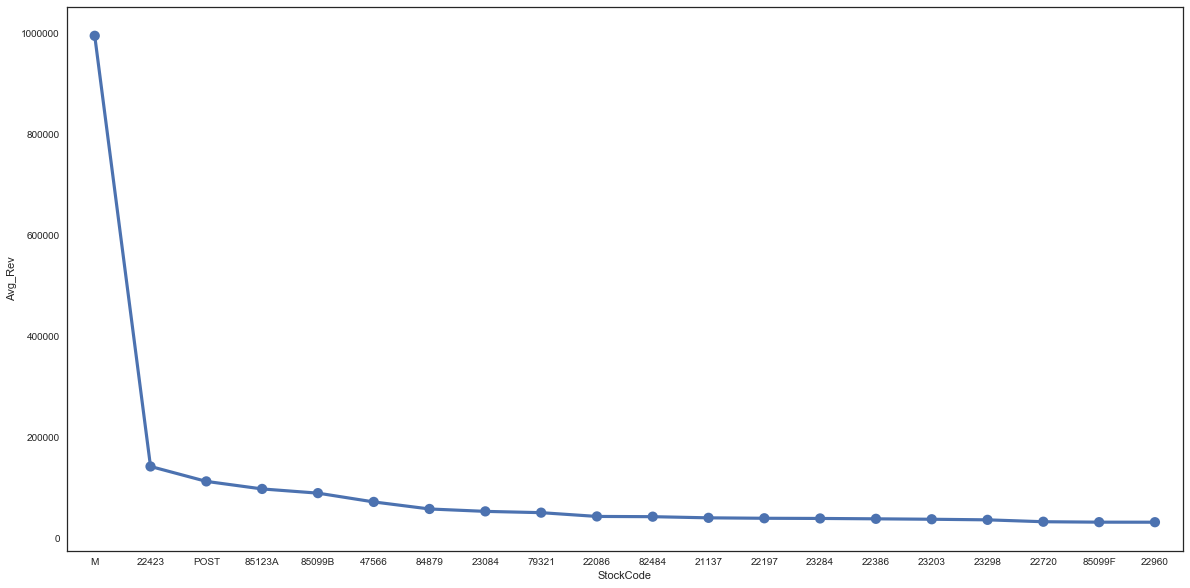

In [201]:
plt.figure(figsize = (20,10))
sns.pointplot(x="StockCode", y="Avg_Rev",ci=False, data=top_sell_df_rev)
plt.show()

### Customers and transactions

In [202]:
# create a new variable, TotalPrice = Quantity * UnitPrice
df['TotalPrice'] = df.Quantity * df.UnitPrice

In [203]:
df[['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice']].head()

,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,536365,6,2.55,15.30
1,536365,6,3.39,20.34
2,536365,8,2.75,22.00
3,536365,6,3.39,20.34
4,536365,6,3.39,20.34


In [204]:
# calculate the number of products purchased and its total price in every transaction
customers_products = pd.DataFrame(df.groupby(['CustomerID', 'InvoiceNo'])['Quantity', 'TotalPrice'].sum())

In [205]:
print(f'There are {len(df.CustomerID.unique())} customers and {len(customers_products)} transactions (sum of unique InvoiceNo).')

There are 4372 customers and 22190 transactions (sum of unique InvoiceNo).


In [206]:
customers_products.head(10)

Quantity  TotalPrice
CustomerID InvoiceNo                      
12346.0    541431        74215    77183.60
           C541433      -74215   -77183.60
12347.0    537626          319      711.79
           542237          315      475.39
           549222          483      636.25
           556201          196      382.52
           562032          277      584.91
           573511          676     1294.32
           581180          192      224.82
12348.0    539318         1254      892.80

The result above shows couple insteresting things worthy of attention:
- the existence of entries with the prefix C for the **InvoiceNo** variable: this indicates transactions that have been canceled
- there are 4372 customers and 22190 transactions (sum of unique InvoiceNo)

In [207]:
# create a new variable, order_canceled(0 not cancel, 1 canceled)
df['order_canceled'] = [1 if 'C' in invoice else 0 for invoice in df.InvoiceNo]

In [208]:
df[df.order_canceled == 1][['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice', 'order_canceled']].head()

,InvoiceNo,Quantity,UnitPrice,TotalPrice,order_canceled
141,C536379,-1,27.50,-27.50,1
154,C536383,-1,4.65,-4.65,1
235,C536391,-12,1.65,-19.80,1
236,C536391,-24,0.29,-6.96,1
237,C536391,-24,0.29,-6.96,1


In [209]:
print(f'Number of transactions canceled: {len(df[df.order_canceled == 1].InvoiceNo.unique())}/{len(customers_products)} ({round(len(df[df.order_canceled == 1].InvoiceNo.unique())/len(customers_products) * 100, 2)}%)')

Number of transactions canceled: 3654/22190 (16.47%)


From the above results we can see that:
- There is a significant amount of transactions have been canceled by customers (16.47%)
- For the orders that been canceled, will have identical negative quantity

In [210]:
# define canceled_transactions, including all the unique invoiceNO
canceled_transactions = set(df[df.order_canceled == 1].InvoiceNo.values) # unique invoiceNO with the prefix C
canceled_transactions.update(set(df[df.order_canceled == 1].InvoiceNo.str.replace('C','').values)) # unique invoiceNO with the prefix C but removed the C

In [211]:
# create a new variable, TotalPaidPrice, indicates the total amount of money that a customer paid for certain items in certain transaction(did not calcel at the end). For the items that the customer finally canceled, will assign value of 0.
df['TotalPaidPrice'] = [0 if row['InvoiceNo'] in canceled_transactions else row['TotalPrice'] for index, row in df.iterrows()]

In [212]:
# example of TotalPaidPrice in normal transaction(not be canceled at the end)
df[['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice', 'TotalPaidPrice']].head()

,InvoiceNo,Quantity,UnitPrice,TotalPrice,TotalPaidPrice
0,536365,6,2.55,15.30,15.30
1,536365,6,3.39,20.34,20.34
2,536365,8,2.75,22.00,22.00
3,536365,6,3.39,20.34,20.34
4,536365,6,3.39,20.34,20.34


In [213]:
# example of TotalPaidPrice in canceled transaction(been canceled at the end)
df[df.order_canceled == 1][['InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice', 'TotalPaidPrice']].head()

,InvoiceNo,Quantity,UnitPrice,TotalPrice,TotalPaidPrice
141,C536379,-1,27.50,-27.50,0.0
154,C536383,-1,4.65,-4.65,0.0
235,C536391,-12,1.65,-19.80,0.0
236,C536391,-24,0.29,-6.96,0.0
237,C536391,-24,0.29,-6.96,0.0


### Create a customer-level dataset

We perform RFM analysis and extract the recency, frequency and monetary value of customers based on their purchase history.

#### Recency
- Create a new variable, "recency", defined as the number of days that have elapsed from each transaction to the latest day in the dataset.
- Create a new variable, "recency_last_transaction", defined as the number of days that have elapsed from  the customer last purchased something to the latest day in the dataset. 
- Hence, smaller numbers indicate more recent transaction on the customer’s account.
- For "recency", the same customer with the same invoiceID will have the same value. But the same customer with different invoiceID will have different values.
- For "recency_last_transaction", the same customer with any invoiceID will have the same value.

In [214]:
# observe the time period in this dataset
print('The latest time in dataset:')
df.InvoiceDate.max()

The latest time in dataset:


Timestamp('2011-12-09 12:50:00')

In [215]:
print('The earliest time in dataset:')
df.InvoiceDate.min()

The earliest time in dataset:


Timestamp('2010-12-01 08:26:00')

In [216]:
# create a new variable, recency, defined as the number of days from the transaction to the latest day in the dataset
# so, smaller numbers indicate more recent transaction on the customer’s account
df['recency'] = [(df.InvoiceDate.max() - invoice_date).days for invoice_date in df.InvoiceDate]

In [217]:
df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'TotalPaidPrice', 'recency']].head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPaidPrice,recency
0,17850.0,536365,2010-12-01 08:26:00,15.30,373
1,17850.0,536365,2010-12-01 08:26:00,20.34,373
2,17850.0,536365,2010-12-01 08:26:00,22.00,373
3,17850.0,536365,2010-12-01 08:26:00,20.34,373
4,17850.0,536365,2010-12-01 08:26:00,20.34,373


In [218]:
# create a new variable, recency_last_transaction
recency_last_transaction_dict = dict(df.groupby(['CustomerID'])['recency'].min())
df['recency_last_transaction'] = [recency_last_transaction_dict[customer] for customer in df.CustomerID]

In [219]:
df[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'TotalPaidPrice', 'recency', 'recency_last_transaction']].head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPaidPrice,recency,recency_last_transaction
0,17850.0,536365,2010-12-01 08:26:00,15.30,373,301
1,17850.0,536365,2010-12-01 08:26:00,20.34,373,301
2,17850.0,536365,2010-12-01 08:26:00,22.00,373,301
3,17850.0,536365,2010-12-01 08:26:00,20.34,373,301
4,17850.0,536365,2010-12-01 08:26:00,20.34,373,301


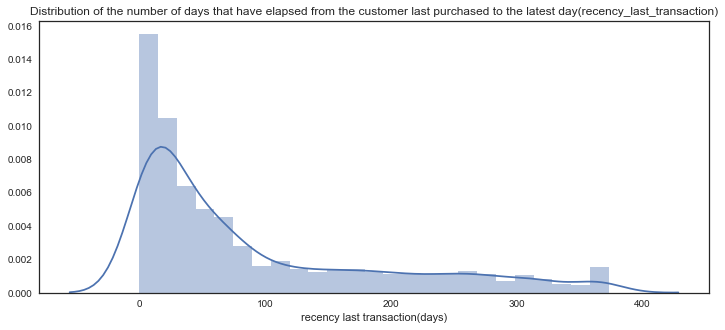

In [220]:
plt.figure(figsize=(12,5))
sns.distplot(pd.Series(df.groupby(['CustomerID'])['recency_last_transaction'].mean().values))
plt.title("Distribution of the number of days that have elapsed from the customer last purchased to the latest day(recency_last_transaction)")
plt.xlabel('recency last transaction(days)')
plt.show()

#### Frequency
- For every customer, the "Frequency_with_cancel" refers to the number of invoices with any purchases(no matter the customer canceled it or not) during the entire time period in this dataset (from 2010-12-01 to 2011-12-09).
- For every customer, the "Frequency_exclude_cancel" refers to the number of invoices with paid purchases(exclude the number of invoice that been canceled) during the entire time period in this dataset (from 2010-12-01 to 2011-12-09).
- The same customer with any invoiceID will have the same value.

In [225]:
# create a new variable, Frequency_with_cancel
Frequency_with_cancel_dict = dict(df.groupby(['CustomerID'])['InvoiceNo'].nunique())
df['Frequency_with_cancel'] = [Frequency_with_cancel_dict[customer] for customer in df.CustomerID]

In [226]:
df[['InvoiceNo', 'CustomerID', 'recency', 'recency_last_transaction', 'Frequency_with_cancel']].head()

,InvoiceNo,CustomerID,recency,recency_last_transaction,Frequency_with_cancel
0,536365,17850.0,373,301,35
1,536365,17850.0,373,301,35
2,536365,17850.0,373,301,35
3,536365,17850.0,373,301,35
4,536365,17850.0,373,301,35


In [227]:
# create a new variable, Frequency_exclude_cancel
Frequency_exclude_cancel_dict = dict(df[df.order_canceled == 0].groupby(['CustomerID'])['InvoiceNo'].nunique())
df['Frequency_exclude_cancel'] = [Frequency_exclude_cancel_dict[customer] if customer in Frequency_exclude_cancel_dict.keys() else 0 for customer in df.CustomerID]

In [228]:
df[['InvoiceNo', 'CustomerID', 'recency', 'recency_last_transaction', 'Frequency_with_cancel', 'Frequency_exclude_cancel']].head()

,InvoiceNo,CustomerID,recency,recency_last_transaction,Frequency_with_cancel,Frequency_exclude_cancel
0,536365,17850.0,373,301,35,34
1,536365,17850.0,373,301,35,34
2,536365,17850.0,373,301,35,34
3,536365,17850.0,373,301,35,34
4,536365,17850.0,373,301,35,34


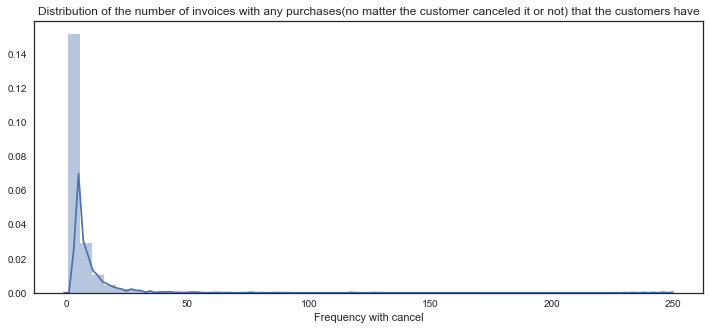

In [229]:
plt.figure(figsize=(12,5))
sns.distplot(pd.Series(df.groupby(['CustomerID'])['Frequency_with_cancel'].mean().values))
plt.title("Distribution of the number of invoices with any purchases(no matter the customer canceled it or not) that the customers have")
plt.xlabel('Frequency with cancel')
plt.show()

In [230]:
pd.Series(df.groupby(['CustomerID'])['Frequency_with_cancel'].mean().values).describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
dtype: float64

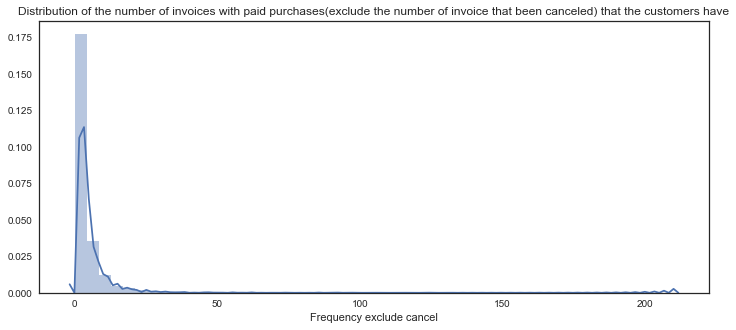

In [231]:
plt.figure(figsize=(12,5))
sns.distplot(pd.Series(df.groupby(['CustomerID'])['Frequency_exclude_cancel'].mean().values))
plt.title("Distribution of the number of invoices with paid purchases(exclude the number of invoice that been canceled) that the customers have")
plt.xlabel('Frequency exclude cancel')
plt.show()

In [232]:
pd.Series(df.groupby(['CustomerID'])['Frequency_exclude_cancel'].mean().values).describe()

count    4372.000000
mean        4.239707
std         7.685252
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       210.000000
dtype: float64

#### Monetary value
- "Monetary_value" is the amount that the customer spent during the year(exclude canceled transaction). For the customers who only have records of cancellation, will be assigned value of 0.
- The same customer with any invoiceID will have the same value.

In [233]:
# create a new variable, Monetary_value
Monetary_value_dict = dict(df.groupby(['CustomerID'])['TotalPaidPrice'].sum())
df['Monetary_value'] = [Monetary_value_dict[customer] for customer in df.CustomerID]

In [234]:
df[['InvoiceNo', 'CustomerID', 'recency', 'recency_last_transaction', 'Frequency_with_cancel', 'Frequency_exclude_cancel', 'Monetary_value']].head()

,InvoiceNo,CustomerID,recency,recency_last_transaction,Frequency_with_cancel,Frequency_exclude_cancel,Monetary_value
0,536365,17850.0,373,301,35,34,5391.21
1,536365,17850.0,373,301,35,34,5391.21
2,536365,17850.0,373,301,35,34,5391.21
3,536365,17850.0,373,301,35,34,5391.21
4,536365,17850.0,373,301,35,34,5391.21


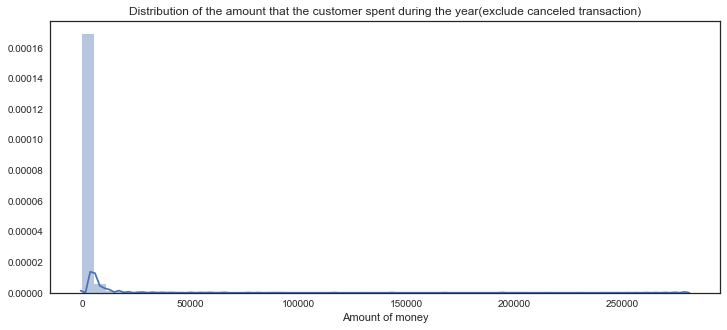

In [236]:
plt.figure(figsize=(12,5))
sns.distplot(pd.Series(df.groupby(['CustomerID'])['Monetary_value'].mean().values))
plt.title("Distribution of the amount that the customer spent during the year(exclude canceled transaction)")
plt.xlabel('Amount of money')
plt.show()

In [237]:
df[['InvoiceNo', 'CustomerID', 'recency', 'recency_last_transaction', 'Frequency_with_cancel', 'Frequency_exclude_cancel', 'Monetary_value']].head()

,InvoiceNo,CustomerID,recency,recency_last_transaction,Frequency_with_cancel,Frequency_exclude_cancel,Monetary_value
0,536365,17850.0,373,301,35,34,5391.21
1,536365,17850.0,373,301,35,34,5391.21
2,536365,17850.0,373,301,35,34,5391.21
3,536365,17850.0,373,301,35,34,5391.21
4,536365,17850.0,373,301,35,34,5391.21


In [238]:
pd.Series(df.groupby(['CustomerID'])['Monetary_value'].mean().values).describe()

count      4372.000000
mean       2032.755923
std        8952.025481
min           0.000000
25%         302.175000
50%         659.435000
75%        1647.315000
max      280206.020000
dtype: float64

In [239]:
# Calculating average monetary value (avg basket size $ & #)
# Retaining and recalculating some of the metrics from the EDA
cust_1 = df.groupby(['CustomerID']).agg({'TotalPrice': 'sum', 'Quantity': 'sum'}).reset_index()
cust_2 = df[['CustomerID','InvoiceNo']]
cust_2.drop_duplicates(inplace = True)
cust_3 = cust_2.groupby(['CustomerID']).agg({'InvoiceNo': 'count'}).reset_index()
cust_4 = cust_1.merge(cust_3, on="CustomerID", how ="left")
cust_4['AvgBasketDollar'] = cust_4['TotalPrice']/cust_4['InvoiceNo']
cust_4['AvgBasketQty'] = cust_4['Quantity']/cust_4['InvoiceNo']
cust_4.head()

,CustomerID,TotalPrice,Quantity,InvoiceNo,AvgBasketDollar,AvgBasketQty
0,12346.0,0.00,0,2,0.000000,0.000000
1,12347.0,4310.00,2458,7,615.714286,351.142857
2,12348.0,1797.24,2341,4,449.310000,585.250000
3,12349.0,1757.55,631,1,1757.550000,631.000000
4,12350.0,334.40,197,1,334.400000,197.000000


### Combining RFM metrics

In [240]:
cust_5 = df[['CustomerID', 'recency_last_transaction']]
cust_5.drop_duplicates(inplace = True)
cust_5.head()

,CustomerID,recency_last_transaction
0,17850.0,301
9,13047.0,31
26,12583.0,2
46,13748.0,95
65,15100.0,329


In [241]:
# Merge all metrics
cust_df = cust_4.merge(cust_5, on="CustomerID", how="left")
cust_df.rename(columns={"recency_last_transaction":"recency","InvoiceNo":"frequency",
                        "TotalPrice":"totalMonetary","Quantity":"totalQty"}, 
               inplace=True)
cust_df.head()

,CustomerID,totalMonetary,totalQty,frequency,AvgBasketDollar,AvgBasketQty,recency
0,12346.0,0.00,0,2,0.000000,0.000000,325
1,12347.0,4310.00,2458,7,615.714286,351.142857,1
2,12348.0,1797.24,2341,4,449.310000,585.250000,74
3,12349.0,1757.55,631,1,1757.550000,631.000000,18
4,12350.0,334.40,197,1,334.400000,197.000000,309


### Treating outliers

In [242]:
cust_df = cust_df[(np.abs(cust_df.totalMonetary-cust_df.totalMonetary.mean())<=(3*cust_df.totalMonetary.std()))]
cust_df = cust_df[(np.abs(cust_df.totalQty-cust_df.totalQty.mean())<=(3*cust_df.totalQty.std()))]
cust_df = cust_df[(np.abs(cust_df.frequency-cust_df.frequency.mean())<=(3*cust_df.frequency.std()))]
cust_df = cust_df[(np.abs(cust_df.AvgBasketDollar-cust_df.AvgBasketDollar.mean())<=(3*cust_df.AvgBasketDollar.std()))]
cust_df = cust_df[(np.abs(cust_df.AvgBasketQty-cust_df.AvgBasketQty.mean())<=(3*cust_df.AvgBasketQty.std()))]
cust_df = cust_df[(np.abs(cust_df.recency-cust_df.recency.mean())<=(3*cust_df.recency.std()))]
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4031 entries, 0 to 4371
Data columns (total 7 columns):
CustomerID         4031 non-null float64
totalMonetary      4031 non-null float64
totalQty           4031 non-null int64
frequency          4031 non-null int64
AvgBasketDollar    4031 non-null float64
AvgBasketQty       4031 non-null float64
recency            4031 non-null int64
dtypes: float64(4), int64(3)
memory usage: 251.9 KB


## Modeling

We use K-means clustering technique on the RFM features extracted above

### Standardizing the variables

In [243]:
# Standardize the variables
cust_std = cust_df[['totalMonetary','totalQty','frequency','AvgBasketDollar','AvgBasketQty',
                    'recency']]
scaler = MinMaxScaler()
scaler.fit(cust_std)
scaler.transform(cust_std)

array([[0.10975959, 0.0573755 , 0.05882353, 0.34387681, 0.20877378,
        0.87131367],
       [0.51571842, 0.52281765, 0.35294118, 0.68991979, 0.67275748,
        0.00268097],
       [0.2790416 , 0.50066275, 0.17647059, 0.59639746, 0.98209567,
        0.19839142],
       ...,
       [0.12639354, 0.07593259, 0.11764706, 0.37696098, 0.25193798,
        0.01876676],
       [0.30242803, 0.31433441, 0.88235294, 0.41572845, 0.32084104,
        0.0080429 ],
       [0.28281297, 0.35769741, 0.11764706, 0.68807209, 0.90732911,
        0.11260054]])

### Elbow-method analysis

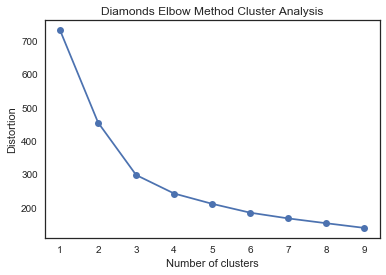

In [244]:
# Use elbow method to decide on the ideal number of clusters
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(cust_std))
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Diamonds Elbow Method Cluster Analysis")
plt.show()

### K-means Clustering

In [245]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
kmeans = km.fit(scaler.transform(cust_std))
y_km = km.fit_predict(scaler.transform(cust_std))
cust_df['cluster'] = kmeans.labels_

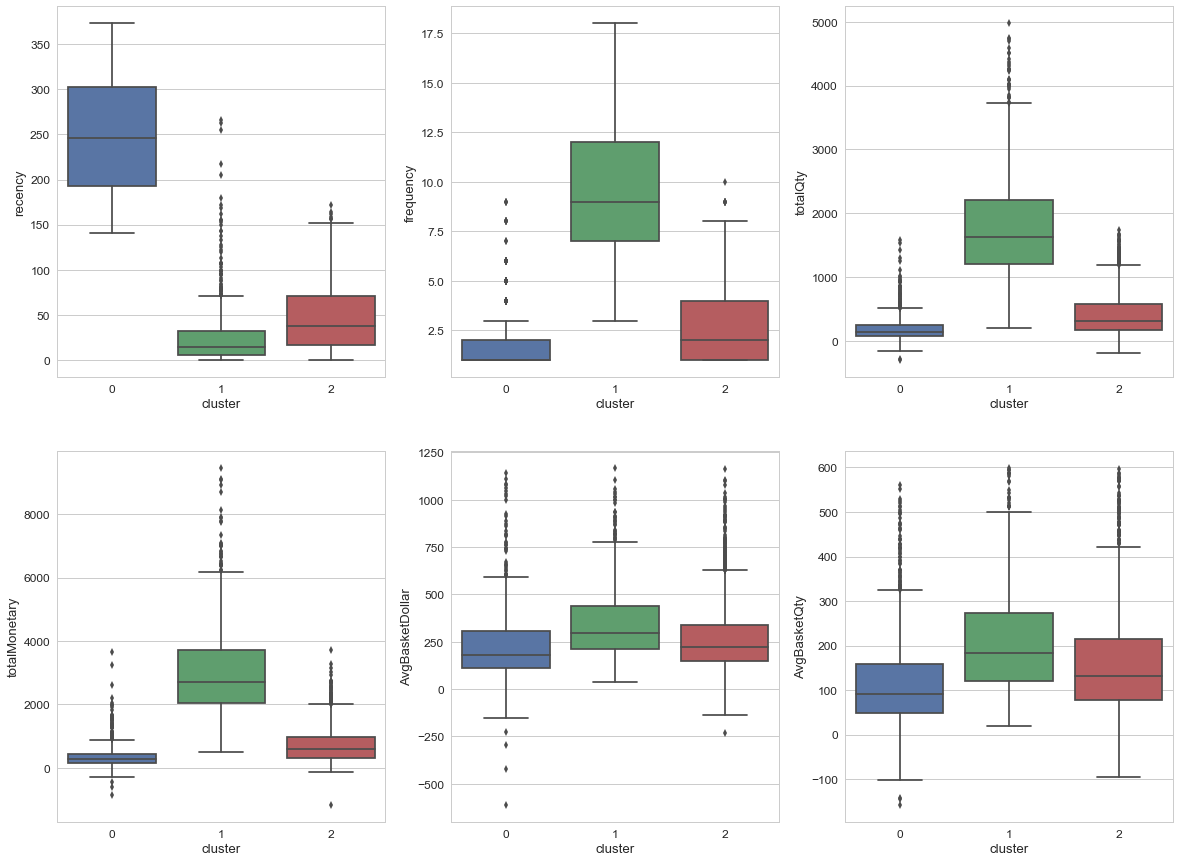

In [246]:
# Visualizing the clusters
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(2,3,1)
sns.boxplot(x='cluster', y='recency', data=cust_df)
plt.subplot(2,3,2)
sns.boxplot(x='cluster', y='frequency', data=cust_df)
plt.subplot(2,3,3)
sns.boxplot(x='cluster', y='totalQty', data=cust_df)
plt.subplot(2,3,4)
sns.boxplot(x='cluster', y='totalMonetary', data=cust_df)
plt.subplot(2,3,5)
sns.boxplot(x='cluster', y='AvgBasketDollar', data=cust_df)
plt.subplot(2,3,6)
sns.boxplot(x='cluster', y='AvgBasketQty', data=cust_df)
plt.show()

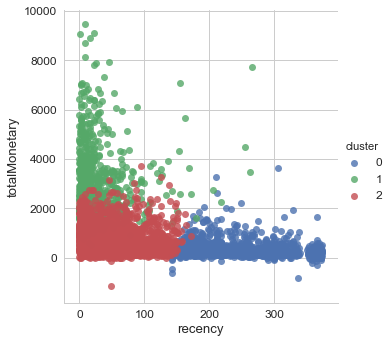

In [247]:
sns.lmplot(x="recency", y="totalMonetary", hue="cluster", data=cust_df, fit_reg=False)

In [248]:
# Silhoutte plot
cust_std['y_km'] = y_km
df0 = cust_std[cust_std.y_km == 0]
df1 = cust_std[cust_std.y_km == 1]
df2 = cust_std[cust_std.y_km == 2]
final_df = df0.append(df1).append(df2)
final_x = final_df.drop('y_km', axis=1)
final_y = final_df['y_km']

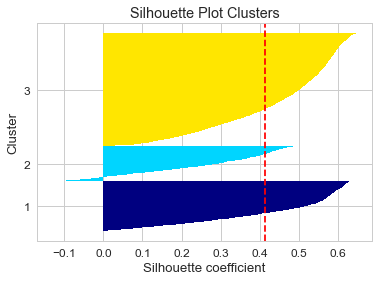

In [249]:
cluster_labels = np.unique(final_y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(final_x),
                                     final_y,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[final_y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot Clusters')
plt.show()

## Reference:
- https://www.kaggle.com/esthergloriadawes/customer-segmentation/notebook
- http://www.kimberlycoffey.com/blog/2016/8/k-means-clustering-for-customer-segmentation